<a href="https://colab.research.google.com/github/ganesh12112/ganesh12112/blob/main/cat_and_dog_claasification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#load dataset
x_train = np.loadtxt('/content/drive/MyDrive/input.csv',delimiter=",")
y_train = np.loadtxt('/content/drive/MyDrive/labels (1).csv',delimiter=",")

x_test = np.loadtxt('/content/drive/MyDrive/input_test (1).csv',delimiter=",")
y_test = np.loadtxt('/content/drive/MyDrive/labels_test (1).csv',delimiter=",")

In [ ]:
print("shape of the x_train:",x_train.shape)
print("shape of the y_train:",y_train.shape)
print("shape of the x_test:",x_test.shape)
print("shape of the y_test:",y_test.shape)

shape of the x_train: (2000, 30000)
shape of the y_train: (2000,)
shape of the x_test: (400, 30000)
shape of the y_test: (400,)


In [ ]:
x_train[0]

array([37., 39., 25., ..., 58., 54., 29.])

In [ ]:
x_train = x_train.reshape(len(x_train),100,100,3)
y_train = y_train.reshape(len(y_train),1)

x_test = x_test.reshape(len(x_test),100,100,3)
y_test = y_test.reshape(len(y_test),1)

x_train = x_train/255.0
x_test = x_test/255.0       ## normalization of data

In [ ]:
print("shape of the x_train:",x_train.shape)
print("shape of the y_train:",y_train.shape)
print("shape of the x_test:",x_test.shape)
print("shape of the y_test:",y_test.shape)

shape of the x_train: (2000, 100, 100, 3)
shape of the y_train: (2000, 1)
shape of the x_test: (400, 100, 100, 3)
shape of the y_test: (400, 1)


In [ ]:
x_train[0].shape

(100, 100, 3)

In [ ]:
x_test[0].shape

(100, 100, 3)

In [ ]:
x_train[0]

array([[[0.14509804, 0.15294118, 0.09803922],
        [0.10196078, 0.09411765, 0.03529412],
        [0.13333333, 0.09803922, 0.03921569],
        ...,
        [0.22352941, 0.17254902, 0.1372549 ],
        [0.23921569, 0.18431373, 0.14901961],
        [0.25490196, 0.2       , 0.16470588]],

       [[0.17647059, 0.16862745, 0.10980392],
        [0.10980392, 0.09803922, 0.03137255],
        [0.20392157, 0.15686275, 0.09411765],
        ...,
        [0.21176471, 0.16078431, 0.1254902 ],
        [0.22352941, 0.16862745, 0.13333333],
        [0.23921569, 0.18431373, 0.14901961]],

       [[0.20392157, 0.17647059, 0.10196078],
        [0.1254902 , 0.09411765, 0.01960784],
        [0.27058824, 0.21176471, 0.1372549 ],
        ...,
        [0.21176471, 0.15686275, 0.11372549],
        [0.21960784, 0.16470588, 0.12156863],
        [0.23137255, 0.17647059, 0.13333333]],

       ...,

       [[0.07843137, 0.15294118, 0.        ],
        [0.39607843, 0.49019608, 0.2627451 ],
        [0.59607843, 0

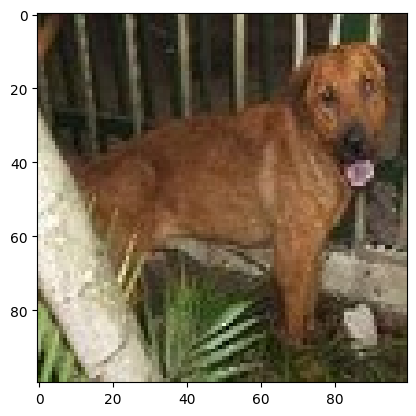

In [ ]:
plt.imshow(x_train[0] )

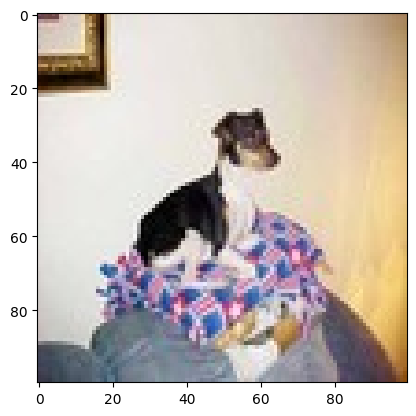

In [ ]:
plt.imshow(x_test[0])

In [ ]:
x_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

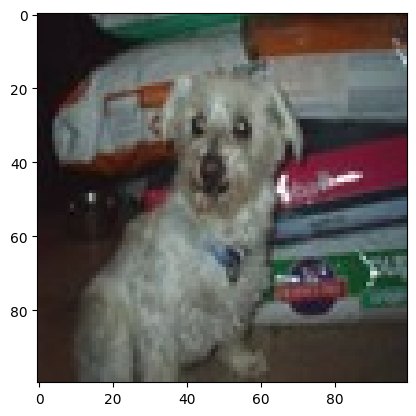

In [ ]:
idx = random.randint(0,len(x_train))
plt.imshow(x_train[idx,:])
plt.show()

In [ ]:
y_train.shape

(2000, 1)

# Model
model = Sequential([
      Conv2D(32,(3,3),activation = "relu",input_shape = (100,100,3)),
      MaxPooling2D((2,2)),

      Conv2D(32,(3,3),activation = 'relu'),
      MaxPooling2D((2,2)),

      Flatten(),
      Dense(64,activation = 'relu'),
      Dense(1,activation = 'sigmoid')

In [ ]:
cnn_model = Sequential()

cnn_model.add(Conv2D(32,(3,3),activation = 'relu',input_shape = (100,100,3)))
cnn_model.add(MaxPooling2D((2,2)))


cnn_model.add(Conv2D(32,(3,3),activation = 'relu'))
cnn_model.add(MaxPooling2D((2,2)))


cnn_model.add(Flatten())
cnn_model.add(Dense(64,activation = 'relu'))
cnn_model.add(Dense(1,activation = 'sigmoid'))


In [ ]:
cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 49, 49, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 16928)             0         
                                                                 
 dense_6 (Dense)             (None, 64)               

In [ ]:
# learning rate
cnn_model.lr_find()
cnn_model.recorder.plot(suggestions=True)

In [ ]:
# add cost function
# we can also use drop the data
# model compilation
cnn_model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [ ]:
# model training
cnnmodel_results = cnn_model.fit(x_train,y_train,epochs = 10,batch_size = 64)

Epoch 1/10
32/32 [==============================] - 21s 651ms/step - loss: 0.2351 - accuracy: 0.9015
Epoch 2/10
32/32 [==============================] - 22s 684ms/step - loss: 0.1783 - accuracy: 0.9400
Epoch 3/10
32/32 [==============================] - 24s 728ms/step - loss: 0.1478 - accuracy: 0.9520
Epoch 4/10
32/32 [==============================] - 21s 656ms/step - loss: 0.1264 - accuracy: 0.9595
Epoch 5/10
32/32 [==============================] - 22s 702ms/step - loss: 0.0818 - accuracy: 0.9775
Epoch 6/10
32/32 [==============================] - 23s 721ms/step - loss: 0.0810 - accuracy: 0.9815
Epoch 7/10
32/32 [==============================] - 21s 673ms/step - loss: 0.0563 - accuracy: 0.9865
Epoch 8/10
32/32 [==============================] - 22s 684ms/step - loss: 0.0374 - accuracy: 0.9930
Epoch 9/10
32/32 [==============================] - 23s 702ms/step - loss: 0.0226 - accuracy: 0.9975
Epoch 10/10
32/32 [==============================] - 22s 680ms/step - loss: 0.0153 - accura

In [ ]:
# hyper parmeter tunning
learn.unfreeze()
learn.fit_one_cycle(20,slice(1e-4,1e-3))
learn.recorder.plot_losses()

In [ ]:
cnn_model.evaluate(x_test,y_test)

13/13 [==============================] - 2s 140ms/step - loss: 1.3476 - accuracy: 0.6775


[1.3475804328918457, 0.6775000095367432]

In [ ]:
cnn_model.predict(x_test)

13/13 [==============================] - 1s 88ms/step


array([[9.04502392e-01],
       [6.26875833e-02],
       [9.01021898e-01],
       [3.31021696e-02],
       [5.26835502e-04],
       [8.40316643e-04],
       [9.99835551e-01],
       [2.05261516e-03],
       [9.99868512e-01],
       [8.23996246e-01],
       [1.76228285e-01],
       [8.86968553e-01],
       [1.41548431e-02],
       [2.15611048e-03],
       [9.99832749e-01],
       [9.99422848e-01],
       [9.15965378e-01],
       [5.25938929e-04],
       [1.86705679e-01],
       [3.45341023e-03],
       [6.16079150e-03],
       [1.57695049e-05],
       [6.27180969e-04],
       [8.96336257e-01],
       [9.37126533e-05],
       [9.86071587e-01],
       [8.30123305e-01],
       [5.31415403e-01],
       [3.34034979e-01],
       [2.73754637e-07],
       [3.51423914e-05],
       [9.99999762e-01],
       [3.43539208e-01],
       [9.99793231e-01],
       [9.96594489e-01],
       [3.23313236e-01],
       [3.75773579e-01],
       [9.99708116e-01],
       [9.99912560e-01],
       [3.61771812e-03],


1/1 [==============================] - 0s 40ms/step
our model says it is a: cat


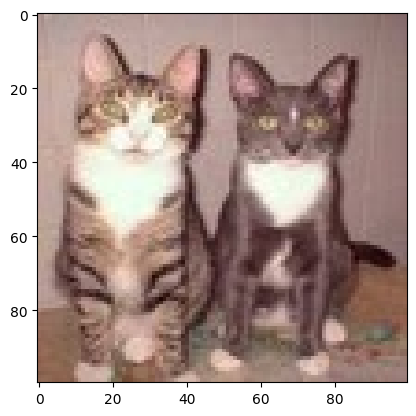

In [ ]:
# making predictions
idx2 = random.randint(0,len(y_test))
plt.imshow(x_test[idx2,:])
plt.show

y_pred = cnn_model.predict(x_test[idx2,:].reshape(1,100,100,3))
y_pred = y_pred > 0.5

if y_pred == 0:
  pred = 'dog'
else:
  pred = 'cat'
print("our model says it is a:",pred)

KeyError: ignored

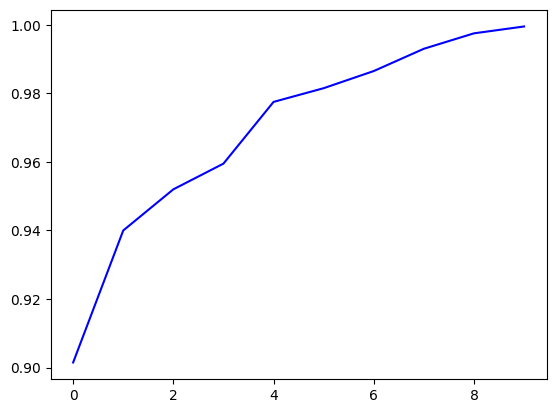

In [ ]:
plt.plot(cnnmodel_results.history['accuracy'],color = "blue",label = "Training accuracy")
plt.plot(cnnmodel_results.history['val_accuracy'],color = "darkred",label = "val accuracy")
plt.legend()
plt.show()

In [ ]:
# interpret the results
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(6,figsize = (25,5))

In [ ]:
#save and load the model
learn.export(file = Path("/kaggle/working/export.pkl"))
learn.model_dir = "/kaggle/working"
learn.save("stage-1",return_path=True)